## Initial Setup

In [17]:
# Initial setup...
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import fitsio
from scipy import interpolate
import glob
import math
import os

import h5py
import bisect

import matplotlib.pyplot as plt

%matplotlib inline


## User input

In [18]:
# debug=True fits a single spectrum with a smaller set of models and over a smaller range of redshifts...
debug=False

## Directory name for the QuickReduced spectra:
#inputFile_obs_dirname = '/data/des40.a/data/dtucker/DESGW_analysis/S190814bv_QR'
# Directory name for the UCSC-processed spectra:
inputFile_obs_dirname = '/data/des40.a/data/dtucker/DESGW_analysis/S190814bv_UCSC'

# Output directory...
output_dirname = '/data/des40.a/data/dtucker/DESGW_analysis/S190814bv_analysis/FigOutput'

if not debug:

    ##'1019_AT2019omx.fits.1d_calib.csv':  Halpha @ 8354A(?)
    #inputFile_obs_list = ['1019_AT2019omx.fits.1d_calib.csv']
    #cleanName_obs_dict = {'1019_AT2019omx.fits.1d_calib.csv':'AT2019omx*'} 
    #z_dict             = {'1019_AT2019omx.fits.1d_calib.csv': 0.275}

    #'AT2019omx.flm': Halpha @ 8354A(?)
    inputFile_obs_list = ['AT2019omx.flm']
    cleanName_obs_dict = {'AT2019omx.flm':'AT2019omx*'} 
    z_dict             = {'AT2019omx.flm': 0.275}
    
    
else:

    #inputFile_obs_list = ['1019_AT2019omx.fits.1d_calib.csv']
    #cleanName_obs_dict = {'1019_AT2019omx.fits.1d_calib.csv':'AT2019omx*'} 
    #z_dict             = {'1019_AT2019omx.fits.1d_calib.csv': 0.275}

    #'AT2019omx.flm': Halpha @ 8354A(?)
    inputFile_obs_list = ['AT2019omx.flm']
    cleanName_obs_dict = {'AT2019omx.flm':'AT2019omx*'} 
    z_dict             = {'AT2019omx.flm': 0.275}


## Plot function

In [19]:
def plot_obs_host_gal(obsname, obsname_clean, z, wavelength_array, df_obs_new, output_dirname):

    ax = df_obs_new.plot('LAMBDA', 'normFLUX', c='#56b4e9', alpha=0.8, label='Observed', fontsize=18)
    title = """%s""" % (obsname_clean)
    plt.title(title, fontsize=35)
    ax.legend(loc='upper right', fontsize=14, framealpha=0.5)
    ax.set_xlabel('wavelength (observed frame) [$\\AA$]',fontsize=16)
    ax.set_ylabel('Relative $F_{\lambda}$',fontsize=16)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
    textstr = """$z_{best}$=%.3f""" % (z)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax.grid(False)
    
    outputFile = """HostGal.%s.png""" % (obsname_clean)
    outputFile = os.path.join(output_dirname, outputFile)
    
    plt.tight_layout()
    plt.savefig(outputFile)

    return 0


## Fit each input observed spectrum


/data/des40.a/data/dtucker/DESGW_analysis/S190814bv_UCSC/AT2019omx.flm
AT2019omx.flm


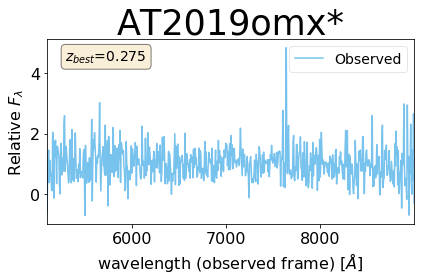

In [41]:
for inputFile_obs in inputFile_obs_list:
    
    fullInputFile_obs = os.path.join(inputFile_obs_dirname, inputFile_obs)
    print 
    print fullInputFile_obs
    
    obsname = os.path.basename(inputFile_obs)
    print obsname 
    obsname_clean = cleanName_obs_dict[inputFile_obs]

    #df_obs = pd.read_csv(fullInputFile_obs)
    #df_obs.rename(columns={"wave":"LAMBDA", "flam":"FLUX"}, inplace=True)

    df_obs = pd.read_csv(fullInputFile_obs, sep='\s+', header = None, names = ['LAMBDA', 'FLUX'])
   
    lambda_lo = df_obs.LAMBDA.min()
    lambda_hi = df_obs.LAMBDA.max()

    wavelength_array = np.arange(lambda_lo, lambda_hi, 6.)

    spec_flux_obs = interpolate.interp1d(df_obs.LAMBDA, df_obs.FLUX,bounds_error=False, fill_value=0.,kind='linear')
    spec_flux_obs_array = spec_flux_obs(wavelength_array)

    df_obs_new = pd.DataFrame({'LAMBDA':wavelength_array, 'FLUX':spec_flux_obs_array})

    norm = df_obs_new['FLUX'].median()
    df_obs['normFLUX'] = df_obs['FLUX']/norm
    df_obs_new['normFLUX'] = df_obs_new['FLUX']/norm

    z = z_dict[inputFile_obs]
    status = plot_obs_host_gal(obsname, obsname_clean, z, wavelength_array, df_obs_new, output_dirname)
    
    #print obsname, obsname_clean, z, output_dirname

In [10]:
df_obs.rename(columns={"wave":"LAMBDA", "flam":"FLUX"}, inplace=True)
df_obs

,LAMBDA,FLUX
0,4526.7348,-0.000000e+00
1,4528.7348,-0.000000e+00
2,4530.7348,-0.000000e+00
3,4532.7348,-0.000000e+00
4,4534.7348,-0.000000e+00
5,4536.7348,-0.000000e+00
6,4538.7348,-0.000000e+00
7,4540.7348,-0.000000e+00
8,4542.7348,-0.000000e+00
9,4544.7348,-0.000000e+00
